#Sentiment Classification of Tweets about Apple and Google Products using Natural Language Processing (NLP ) By G10 Data Scientists

Final Project Submission - Phase 4

    Student name: GROUP 10_G10 Data scientists.
    Members: Brenda Kinoti, John Karanja, Victor Mawira, Michelle Mwendwa, Loise Mbago, Stephen Gathai.
    Student pace: Part Time
    Scheduled project review date/time:27th August  2023



##Project Overview

This project employs NLP and classification methods to classify text data from tweets as having positive, negative, or neutral sentiment. Several NLP preprocessing steps are taken before models are fit to the data to make predictions.

##1.0 Business Understanding

**1.1 Background**

Crowd Brands and products Emotions(CBPE) is a company in the business of analysing /rating customers sentiments and or tweets .CBPE was asked if ;

(a)tweets expressed positive, negative, or no emotion towards a brand and/or product.

(b)If some emotion was expressed ,they were also asked to say which brand or product was the target of that emotion.

To address these questions, CBPE   requested G10 Data Scientists  to build a tweets sentiments analysis  prediction system that can  rate the sentiment of a Tweet based on its content.


**1.2 Business Problem**

As social media platforms have over the years become a key public forum, Institutions /individuals have looked for new ways to derive insights about products and companies. Twitter is one of the largest of such platforms, making it a great candidate with which to search for information. Analyzing sentiment regarding products and companies serves as an important  way to predict the products or companies that will be successful and those that won't. In addition, in can also serve as a new line to the customer to take feedback about what people liked about a product and what they didn't. Twitter sentiment can also be used to drive investment decisions, with companies that exhibit an increase in postive sentiment over time presumed to be better investments than an equal counterpart with a negative trend in sentiment.



**1.3 Project Question**

The Project seeks to investigate :

(a)How accurately can the developed sentiment classification model predict the sentiment of tweets?

(b)Can the system accurately identify the brands or products that are being mentioned in tweets expressing emotions?

(c)What are the most common sentiments expressed on Twitter towards different brands and products?

(4)To what extent can sentiment analysis on Twitter be used to predict the success of products or companies?

**1.4 Objectives**

(a)Sentiment Classification Model: Develop a robust NLP-based sentiment classification model that accurately categorizes tweets into positive, negative, or neutral sentiments.

(b) NLP Preprocessing: Implement various NLP preprocessing steps, such as tokenization, stopword removal, and text normalization, to prepare the tweet data for effective analysis and modeling.

(c) Modelling : Create a model that can correctly  classify a tweet  sentiment whether positive,negative or neutral , based on the content of the tweet.

(d)Insight Generation: Generate insights about customer sentiments towards brands and products, which can help companies make informed decisions about their products and marketing strategies.

**1.5 Stakeholders**

(a)Crowd Brands and Products Emotions (CBPE): The organization requesting us to undertake the  project, they are the primary beneficiary of the sentiment analysis insights.

(b)G10 Data Analysts: The team responsible for building the sentiment analysis system and generating insights.

(c)Companies and Brands: Businesses seeking to understand customer sentiment towards their products and brands.

(d)Investors: Individuals or entities looking to make investment decisions based on sentiment trends.

(e) Marketing Teams: Teams interested in refining their marketing strategies based on customer feedback and sentiment.

(f) Customers: Individuals whose sentiments are being analyzed; they indirectly benefit from improvements in products and services based on the insights.

(g)Academic/Research Community: Researchers and academics interested in studying sentiment analysis, NLP techniques, and their real-world applications.

(h) General Public: Social media users who might find value in understanding how sentiments shape public opinion about products and companies.

**1.6 Hypothesis**


Hypothesis 1: Sentiment Classification Model Accuracy

    Null Hypothesis (H0): The sentiment classification model achieves an accuracy of 70% or lower in categorizing tweets correctly.
    Alternative Hypothesis (H1): The sentiment classification model achieves an accuracy of more than 70% in categorizing tweets correctly.


##2.0 Data Understanding

The dataset contains 9092 tweets as added on  August 30, 2013 by Kent Cavender-Bares . It was obtained from CrowdFlower Open Source Datasets. The tweets are are about either Apple or Google or any of their respective products and services. Each tweet is labeled by a human observer to be either 'Positive Sentiment', 'Negative sentiment', 'No emotion toward brand or product', or 'I can't tell.'


In [ ]:
#importing necessary libraries

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd      # Data manipulation and analysis
import numpy as np       # Numerical operations

import nltk              # Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import re                # Regular expressions for text cleaning
import string            # String operations

import gensim            # For topic modeling and document similarity

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization
from sklearn.model_selection import train_test_split   # Data splitting
from sklearn.metrics import classification_report, confusion_matrix  # Model evaluation

import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns             # Data visualization
from wordcloud import WordCloud
import warnings

In [ ]:
#Loading the data set
df = pd.read_csv('tweet_product_company.csv', encoding='latin-1')

In [ ]:
# Checking the first five  lines of the data
df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
#checking the last five lines of the data
df.tail(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


A function to check on data set shape,missing values ,duplicate values ,unique value ,info and column names

In [ ]:
def analyze_dataset(df):

    # Dataset shape
    print("Shape of the dataset:", df.shape, '\n')
    print("*"*50)

    # Missing values
    print("Null Values count:", df.isnull().sum(), '\n')
    print("*"*50)

    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]), '\n')
    print("*"*50)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*50)

    # Dataset information
    print("Information about the dataset:")
    print(df.info())
    print("*"*50)

    #column names
    print("Information about the dataset:")
    print(df.columns)
    print("*"*50)

analyze_dataset(df)


Shape of the dataset: (9093, 3) 

**************************************************
Null Values count: tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64 

**************************************************
Number of duplicates: 22 

**************************************************
The unique values per column are:
tweet_text                                            9065
emotion_in_tweet_is_directed_at                          9
is_there_an_emotion_directed_at_a_brand_or_product       4
dtype: int64 

**************************************************
Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 

**Interpretation of the provided dataset information:**

(a)Shape of the Dataset (9092, 3):
        The dataset contains 9092 rows and 3 columns.

(b) Null Values Count:
        There are no null values in the'is_there_an_emotion_directed_at_a_brand_or_product (sentiment)' columns.
        The 'emotion_in_tweet_is_directed_at (brand_product')' column has 5801 null values and the 'tweet_text' column has one null value.

(c) Number of Duplicates:
        There are 22 duplicate rows in the dataset.

(d) Unique Values per Column:
        'tweet_text' column has 9065 unique values.
        'emotion_in_tweet_is_directed_at (brand_product)' column has 9 unique values.
        'is_there_an_emotion_directed_at_a_brand_or_product (sentiment)' column has 4 unique values.

(e) Information about the Dataset:
        The dataset is stored as a pandas DataFrame.
        The dataset has 9092 entries.
        The 'tweet_text' has 1 missing value. 'is_there_an_emotion_directed_at_a_brand_or_product (sentiment)' columns have no missing values.
        The 'emotion_in_tweet_is_directed_at (brand_product)' column has 3291 non-null values.
        All columns are of the 'object' data type (typically strings).
       
(f) Columns in the Dataset:
        The dataset has three columns named 'tweet_text', 'emotion_in_tweet_is_directed_at (brand_product'), and 'is_there_an_emotion_directed_at_a_brand_or_product (sentiment)'.


In [ ]:
#checking the duplicated rows
df[df.duplicated()]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


Renaming the columns in order to make them  more descriptive and easier to work with for subsequent analysis

In [ ]:
df.rename(columns={'tweet_text':'tweet', 'emotion_in_tweet_is_directed_at':'brand_product',
                  'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'}, inplace=True)

In [ ]:
# Check the distribution of sentiment labels
print(df['sentiment'].value_counts())

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64


In [ ]:
# Get value counts and percentages for brand_product column
brand_product_counts = df['brand_product'].value_counts()
brand_product_percentages = (brand_product_counts / brand_product_counts.sum()) * 100

# Calculate total count and total percentage
total_count = len(df['brand_product'])
total_percentage = 100

# Combine counts and percentages into a DataFrame
brand_product_info = pd.DataFrame({
    'Counts': brand_product_counts,
    'Percentages': brand_product_percentages
})

# Append total summations
total_info = pd.Series({'Counts': total_count, 'Percentages': total_percentage}, name='Total')
brand_product_info = brand_product_info.append(total_info)

# Print the information
print("Brand/Product Information:")
print(brand_product_info)


Brand/Product Information:
                                 Counts  Percentages
iPad                                946    28.745062
Apple                               661    20.085081
iPad or iPhone App                  470    14.281373
Google                              430    13.065937
iPhone                              297     9.024613
Other Google product or service     293     8.903069
Android App                          81     2.461258
Android                              78     2.370100
Other Apple product or service       35     1.063507
Total                              9093   100.000000


<ipython-input-9-304163e99006>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brand_product_info = brand_product_info.append(total_info)


* Group by 'brand_product' and 'sentiments', then count occurrences
By examining the counts, percentages, and rankings, in order to  quickly assess how sentiments are distributed for different brand products. This will help in seeing which sentiment is most prevalent, which products receive more positive or negative sentiments, and how sentiments compare across different products.

In [ ]:

# Group by 'brand_product' and 'sentiments', then count occurrences
sentiment_distribution = df.groupby(['brand_product', 'sentiment']).size().reset_index(name='count')

# Calculate the total count per brand_product
total_counts_per_brand_product = sentiment_distribution.groupby('brand_product')['count'].transform('sum')

# Calculate percentages
sentiment_distribution['percentage'] = (sentiment_distribution['count'] / total_counts_per_brand_product) * 100

# Pivot the table for better presentation
pivot_table = sentiment_distribution.pivot(index='brand_product', columns='sentiment', values=['count', 'percentage'])

# Fill NaN values with 0
pivot_table.fillna(0, inplace=True)

# Print the pivot table
print("Sentiment Distribution by Brand/Product (Counts and Percentages):")
print(pivot_table)


Sentiment Distribution by Brand/Product (Counts and Percentages):
                                       count                   \
sentiment                       I can't tell Negative emotion   
brand_product                                                   
Android                                  0.0              8.0   
Android App                              0.0              8.0   
Apple                                    2.0             95.0   
Google                                   1.0             68.0   
Other Apple product or service           0.0              2.0   
Other Google product or service          1.0             47.0   
iPad                                     4.0            125.0   
iPad or iPhone App                       0.0             63.0   
iPhone                                   1.0            103.0   

                                                                    \
sentiment                       No emotion toward brand or product   
brand_product

**Interpreting of Sentiment Distribution by Brand/Product (Counts and Percentages)**
Interpreting Counts: The "count" columns represent the number of occurrences of each sentiment category for a specific brand product. For instance, for the brand product "Apple," there were 2 occurrences of Negative emotion, 21 of No emotion toward brand or product, and 543 of Positive emotion.

Interpreting Percentages: The "percentage" columns show the percentage distribution of each sentiment category relative to the total sentiments expressed for the respective brand product. For example, for the brand product "Apple," Negative emotion accounts for approximately 14.37% of the total sentiments, No emotion toward brand or product is around 3.18%, and Positive emotion constitutes around 82.15%.

Interpreting Rankings: The "ranking" columns display the ranking of each sentiment category based on the highest occurrence count. For instance, for the brand product "Apple," the sentiment category with the highest count is Positive emotion, ranked as 1. Negative emotion is ranked second, followed by No emotion toward brand or product, and finally, I can't tell

##3.0 Data Cleaning

In [ ]:
#Dropping of duplicated columns
#We decided to drop the duplicated columns because they are only 22 in number being (22/9092*100=0.25%)
#and thus their dropping won't affect the data set.
df.drop_duplicates(keep='first', inplace=False)

,tweet,brand_product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Duplicated were dropped successful thus reducing the number of rows to 9071 from 9092

**Dealing with Missing values on the 'tweet' and 'brand_product' columns**

**tweet column**

In [ ]:
#Checking columns with Null values
df.isna().sum()

tweet               1
brand_product    5802
sentiment           0
dtype: int64

Tweet column has one null value and brand_product has a total of 5,802 null values
From this observation we decided to drop the null value under tweet column because it won't affect
the dataset .brand_product null values are retained at this point due to their huge percentage.

In [ ]:
df.dropna(subset=["tweet"],inplace=True)

In [ ]:
df.isna().sum()

tweet               0
brand_product    5801
sentiment           0
dtype: int64

**brand_product column**

We then decided to fill the  missing values in the 'brand_product' column with the value 'no_brand'.i.e. indicating that there was no specific brand or product mentioned in the tweet.Also ,the 'tweet' column is being explicitly converted to string type because it might contains mixed data types which might affect future analysis /modeling .

In [ ]:
df['brand_product'].fillna('no_brand', inplace=True)
df['tweet'] = df['tweet'].astype(str)

Identify the product category (e.g., 'iPad or iPhone App', 'Android App') for tweets that have missing or generic 'brand_product' values by looking for specific keywords associated with each product category in the tweet text. If relevant keywords are found, the product category is updated for that tweet. This helps in better categorizing tweets based on their content.

In [ ]:
app_keywords = {
    'iPad or iPhone App': ['ipad', 'iphone'],
    'Android App': ['android']
}
for i, row in df.iterrows():
    if row['brand_product'] == 'no_brand':
        tweet = row['tweet'].lower()
        for app_category, keywords in app_keywords.items():
            if any(keyword in tweet for keyword in keywords):
                df.at[i, 'brand_product'] = app_category
                break


Identify the device mentioned in tweets where the 'brand_product' information is missing or generic. It checks for the presence of specific keywords associated with each device ('iPad', 'iPhone', 'Android') in the tweet text. If any relevant keyword is found, the 'brand_product' value is updated to match the identified device. This helps in categorizing tweets based on the devices being discussed.

In [ ]:
apple_keywords = ['iPhone', 'iPad', 'iTunes', 'iphone', 'ipad', 'itunes', 'apple', '#iPhone', '#iphone',
                 '#iPad', '#ipad', '#Apple', '#apple', 'Apple', 'IPAD', 'IPHONE', 'ITUNES', 'IPad', 'IPhone']
google_keywords = ['Google', 'google', 'Android', 'android', '#google', '#Google', '#Android', '#android',
                  'GOOGLE', 'ANDROID']
for i, row in df.iterrows():
    if row['brand_product'] == 'no_brand':
        tweet_phrase = row['tweet']
        for word in apple_keywords:
            if word in tweet_phrase:
                df.at[i, 'brand_product'] = 'Apple'
                break  # Exit the loop if a match is found
        for word in google_keywords:
            if word in tweet_phrase:
                df.at[i, 'brand_product'] = 'Google'
                break  # Exit the loop if a match is found

Categorizing tweets based on the presence of specific keywords related to Apple or Google. If any of the keywords in the respective keyword lists are found in the tweet text, the 'brand_product' column is updated accordingly. Once a match is found and the brand/product category is assigned, the loop terminates for that particular tweet.
This process helps categorize tweets into meaningful brand/product categories, which can be useful for further analysis or classification tasks.

In [ ]:
device_keywords = {
    'iPad': ['iPad', 'ipad', 'IPad', 'IPAD', 'Ipad', '#ipad', '#iPad', '#IPad', '#IPAD', '#Ipad'],
    'iPhone': ['iPhone', 'iphone', 'IPhone', 'IPHONE', 'Iphone', '#iphone', '#iPhone', '#IPhone',
               '#Iphone', '#IPHONE'],
    'Android': ['android', 'Android', 'ANDROID', '#android', '#Android', '#ANDROID']
}
for i, row in df.iterrows():
    if row['brand_product'] == 'no_brand':
        tweet_phrase = row['tweet']
        for device, keywords in device_keywords.items():
            if any(keyword in tweet_phrase for keyword in keywords):
                df.at[i, 'brand_product'] = device
                break

Display the results after categorizing and assigning missing values labelled as no_brand to the different brands/products

In [ ]:
print(df['brand_product'].value_counts())

iPad or iPhone App                 2878
Google                             2144
Apple                              1400
iPad                                946
no_brand                            710
Android App                         311
iPhone                              297
Other Google product or service     293
Android                              78
Other Apple product or service       35
Name: brand_product, dtype: int64


We have significantly reduced the number of unbranded tweets by running the for loops which will help in future exploratory analysis.

Bar chart to provide a visual representation of how the different brand/product categories are distributed based on their respective counts. This visualization helps in quickly understanding the popularity or occurrence of each category within the dataset.

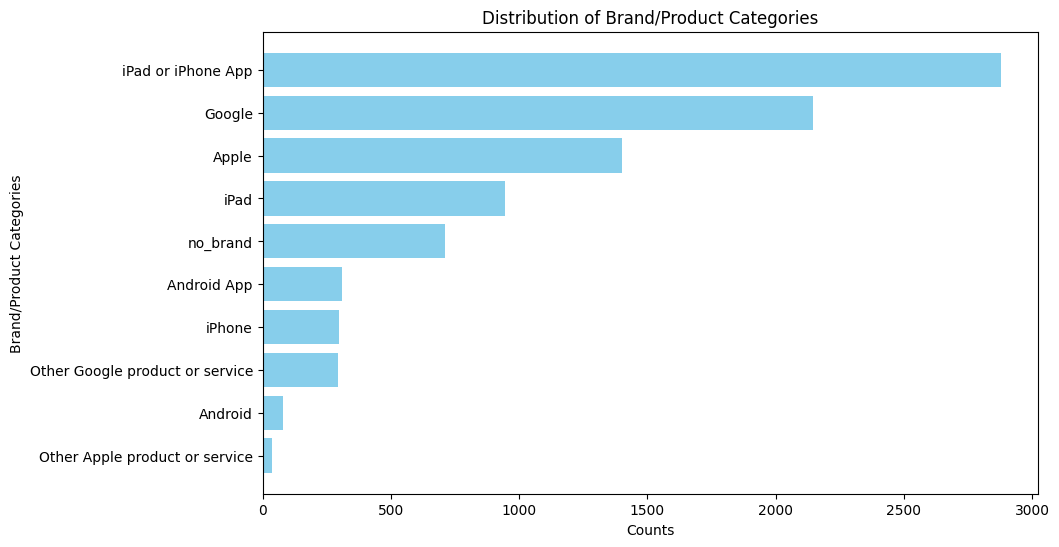

In [ ]:
# Data
categories = ['iPad or iPhone App', 'Google', 'Apple', 'iPad', 'no_brand',
              'Android App', 'iPhone', 'Other Google product or service',
              'Android', 'Other Apple product or service']
counts = [2878, 2144, 1400, 946, 711, 311, 297, 293, 78, 35]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Brand/Product Categories')
plt.title('Distribution of Brand/Product Categories')
plt.gca().invert_yaxis()  # Invert y-axis to have 'iPad or iPhone App' on top
plt.show()

## Cleaning Sentiment column


Different sentiment categories in the dataset in order to understand the relative frequency of each sentiment

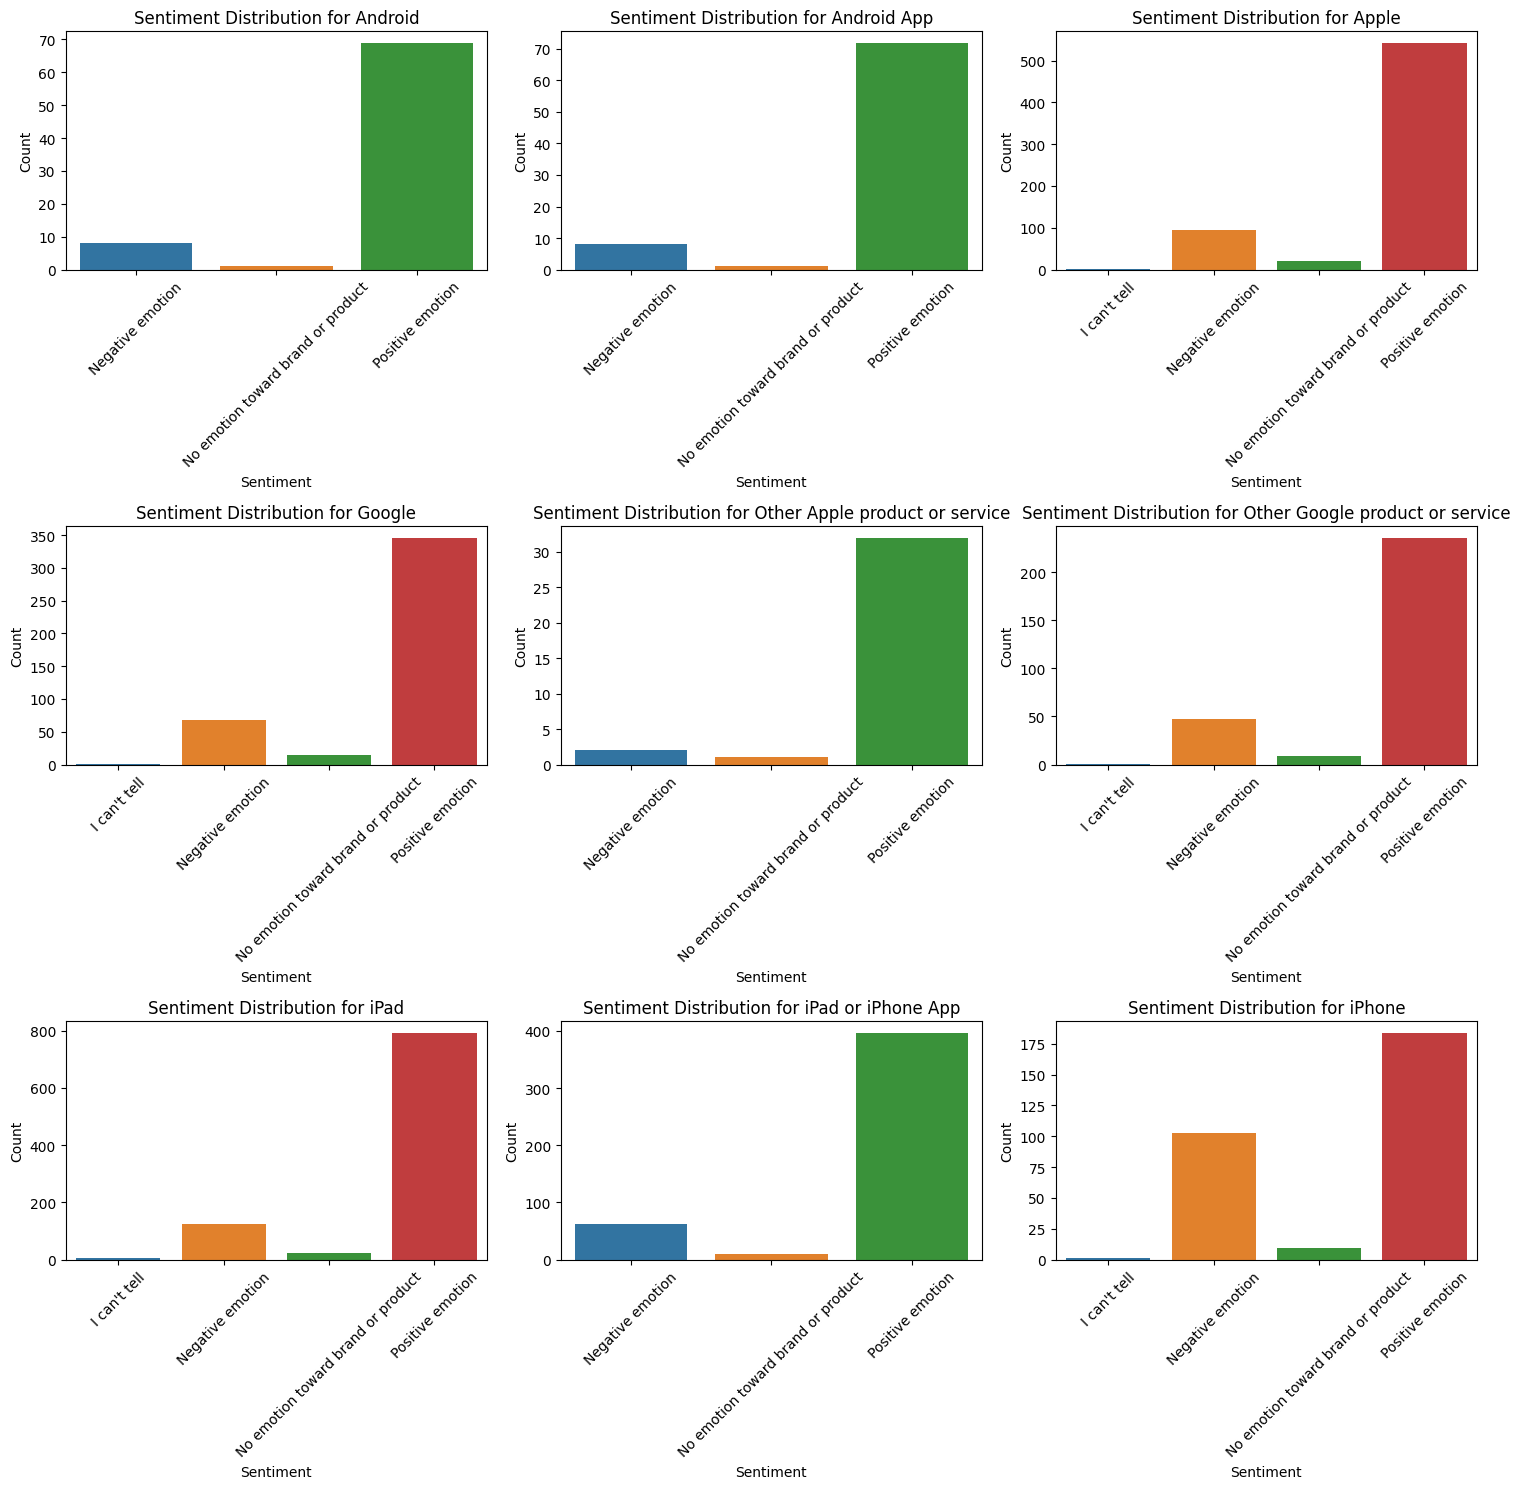

In [ ]:
unique_brand_products = sentiment_distribution['brand_product'].nunique()

# Calculate number of rows and columns for the subplots
n_rows = int(np.ceil(unique_brand_products / 3))
n_cols = 3 if unique_brand_products > 3 else unique_brand_products

# Visualization
plt.figure(figsize=(15, 5 * n_rows))
for idx, brand_product in enumerate(sentiment_distribution['brand_product'].unique(), 1):
    plt.subplot(n_rows, n_cols, idx)
    subset = sentiment_distribution[sentiment_distribution['brand_product'] == brand_product]
    sns.barplot(x='sentiment', y='count', data=subset)
    plt.title(f'Sentiment Distribution for {brand_product}')
    plt.ylabel('Count')
    plt.xlabel('Sentiment')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Check the distribution of sentiment labels
df["sentiment"].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

Excluding "I can't tell" sentiments since they do not display any sentiment or express neutrality

In [ ]:
df = df[df["sentiment"] != "I can't tell"]

In [ ]:
df["sentiment"].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: sentiment, dtype: int64

Replace all occurrences of the value 'No emotion toward brand or product' in the "sentiment" column with the value 'neutral'. This is useful for standardizing and cleaning the data, in order to group similar values under a common label or name.

In [ ]:
df['sentiment'] = df['sentiment'].replace('No emotion toward brand or product', 'neutral')

In [ ]:
# Get the sentiment value counts and calculate percentages

sentiment_counts = df["sentiment"].value_counts()
total_sentiments = len(df["sentiment"])
sentiment_percentages = (sentiment_counts / total_sentiments) * 100

# Create a DataFrame to store counts and percentages
sentiment_summary = pd.DataFrame({
    "Counts": sentiment_counts,
    "Percentages": sentiment_percentages
})

# Display the sentiment summary
print("Sentiment Distribution (Counts and Percentages):")
print(sentiment_summary)


Sentiment Distribution (Counts and Percentages):
                  Counts  Percentages
neutral             5388    60.295434
Positive emotion    2978    33.325873
Negative emotion     570     6.378693


## Cleaning the tweet column

Clean and preprocess the text data in the 'tweet' column, removing noise and making it more suitable for NLP tasks such as text classification, sentiment analysis and  modeling.

In [ ]:
def preprocess_text(text):
    # Remove URLs using a regular expression
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, numbers, and punctuation (except spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()

    # Remove extra whitespaces
    text = ' '.join(text.split())

    return text

# Apply the preprocessing function to the 'tweet' column in the DataFrame
df['tweet'] = df['tweet'].apply(preprocess_text)

# Example: Print the first few preprocessed tweets
print(df['tweet'].head())

0    wesley i have a g iphone after hrs tweeting at...
1    jessedee know about fludapp awesome ipadiphone...
2    swonderlin can not wait for ipad also they sho...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: tweet, dtype: object


In [ ]:
# Examining the data frame
df.head()

,tweet,brand_product,sentiment
0,wesley i have a g iphone after hrs tweeting at...,iPhone,Negative emotion
1,jessedee know about fludapp awesome ipadiphone...,iPad or iPhone App,Positive emotion
2,swonderlin can not wait for ipad also they sho...,iPad,Positive emotion
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on fri sxsw marissa maye...,Google,Positive emotion


In [ ]:
#Examining the data frame (tail )
df.tail()

,tweet,brand_product,sentiment
9088,ipad everywhere sxsw link,iPad,Positive emotion
9089,wave buzz rt mention we interrupt your regular...,Google,neutral
9090,googles zeiger a physician never reported pote...,Google,neutral
9091,some verizon iphone customers complained their...,iPad or iPhone App,neutral
9092,rt mention google tests checkin offers at sxsw...,Google,neutral


**Tokenization and stopwords removal of tweet column**

Preparing the text data for further NLP tasks by removing irrelevant and common words (stop words), tokenizing the text into words, and creating a cleaner representation of the text for analysis, classification, or modeling purposes.

In [ ]:
# Download NLTK data if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

# Define a list of stop words
stopwords_list = stopwords.words('english')
stopwords_list += [str(i) for i in range(10)]
stopwords_list += ['sxsw', 'mention',"link","rt"]

stop_words = set(stopwords_list)

def tokenize_and_remove_stopwords(text):
    # Tokenize the text into words using NLTK's word_tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return filtered_tokens

# Apply preprocessing to the 'tweet' column
df['tweet'] = df['tweet'].apply(preprocess_text)

# Apply tokenization and stop word removal to the preprocessed 'tweet' column
df['tokenized_tweet'] = df['tweet'].apply(tokenize_and_remove_stopwords)

# Example: Print the first few tokenized tweets with stop words removed
print(df['tokenized_tweet'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [wesley, g, iphone, hrs, tweeting, riseaustin,...
1    [jessedee, know, fludapp, awesome, ipadiphone,...
2                 [swonderlin, wait, ipad, also, sale]
3    [hope, years, festival, isnt, crashy, years, i...
4    [sxtxstate, great, stuff, fri, marissa, mayer,...
Name: tokenized_tweet, dtype: object


In [ ]:
#Examining the data frame
df.head()

,tweet,brand_product,sentiment,tokenized_tweet
0,wesley i have a g iphone after hrs tweeting at...,iPhone,Negative emotion,"[wesley, g, iphone, hrs, tweeting, riseaustin,..."
1,jessedee know about fludapp awesome ipadiphone...,iPad or iPhone App,Positive emotion,"[jessedee, know, fludapp, awesome, ipadiphone,..."
2,swonderlin can not wait for ipad also they sho...,iPad,Positive emotion,"[swonderlin, wait, ipad, also, sale]"
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion,"[hope, years, festival, isnt, crashy, years, i..."
4,sxtxstate great stuff on fri sxsw marissa maye...,Google,Positive emotion,"[sxtxstate, great, stuff, fri, marissa, mayer,..."


**Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')

nltk.download('omw-1.4')

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to the 'tokenized_tweet' column
df['lemmatized_tweet'] = df['tokenized_tweet'].apply(lemmatize_tokens)

# Example: Print the first few tokenized and lemmatized tweets
print(df['lemmatized_tweet'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [wesley, g, iphone, hr, tweeting, riseaustin, ...
1    [jessedee, know, fludapp, awesome, ipadiphone,...
2                 [swonderlin, wait, ipad, also, sale]
3    [hope, year, festival, isnt, crashy, year, iph...
4    [sxtxstate, great, stuff, fri, marissa, mayer,...
Name: lemmatized_tweet, dtype: object


In [ ]:
df.head()

,tweet,brand_product,sentiment,tokenized_tweet,lemmatized_tweet
0,wesley i have a g iphone after hrs tweeting at...,iPhone,Negative emotion,"[wesley, g, iphone, hrs, tweeting, riseaustin,...","[wesley, g, iphone, hr, tweeting, riseaustin, ..."
1,jessedee know about fludapp awesome ipadiphone...,iPad or iPhone App,Positive emotion,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,..."
2,swonderlin can not wait for ipad also they sho...,iPad,Positive emotion,"[swonderlin, wait, ipad, also, sale]","[swonderlin, wait, ipad, also, sale]"
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,sxtxstate great stuff on fri sxsw marissa maye...,Google,Positive emotion,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, great, stuff, fri, marissa, mayer,..."


Display a word cloud visualization from a collection of the lemmatized tweets

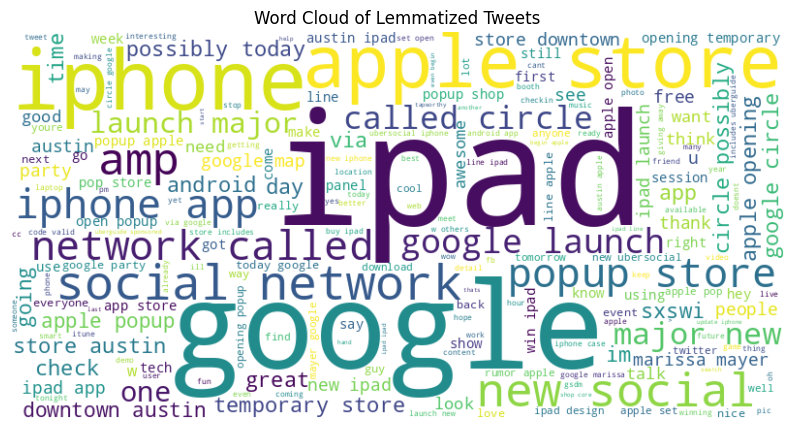

In [ ]:
# Combine all the lemmatized tokens into a single text string
all_text = ' '.join(' '.join(tokens) for tokens in df['lemmatized_tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Lemmatized Tweets')
plt.show()

**EDA Analysis of the Positive Negative and Neutral Sentiments**

Our aim is to create separate lists of words for positive, negative, and neutral sentiments from the lemmatized tweets, and then generate a WordCloud visualization that would provide insights into the words commonly used in each sentiment category.

In [ ]:
positive_text = []
negative_text = []
neutral_text = []

# Filter the DataFrame for different sentiment categories
positive_df = df[df['sentiment'] == 'Positive emotion']
negative_df = df[df['sentiment'] == 'Negative emotion']
neutral_df = df[df['sentiment'] == 'neutral']

for list_element in positive_df['lemmatized_tweet']:
    for word in list_element:
        positive_text.append(word) #add each word in the tweet_tokens list to a postive words list

for list_element in negative_df['lemmatized_tweet']:
    for word in list_element:
        negative_text.append(word)

for list_element in neutral_df['lemmatized_tweet']:
    for word in list_element:
        neutral_text.append(word)

positive_str = ' '.join(positive_text) #create one string of of all positive words for generating a WordCloud
negative_str = ' '.join(negative_text)
neutral_str = ' '.join(neutral_text)

In [ ]:
from collections import Counter
#create a dictionary with word counts so we can quantify the most common words
pos_dict = Counter(positive_text)
neg_dict = Counter(negative_text)
neu_dict = Counter(neutral_text)

In [ ]:
#sort the word counts in descending order
pos_dict_sorted = dict(sorted(pos_dict.items(), key=lambda item: item[1], reverse=True))
neg_dict_sorted = dict(sorted(neg_dict.items(), key=lambda item: item[1], reverse=True))
neu_dict_sorted = dict(sorted(neu_dict.items(), key=lambda item: item[1], reverse=True))

#create dataframes of words counts for each type of tweet
pos_text_df = pd.DataFrame.from_dict(pos_dict_sorted, orient='index', columns=['Count'])
pos_text_df.reset_index(inplace=True)
pos_text_df.rename(columns={'index':'Word'}, inplace=True)

neg_text_df = pd.DataFrame.from_dict(neg_dict_sorted, orient='index', columns=['Count'])
neg_text_df.reset_index(inplace=True)
neg_text_df.rename(columns={'index':'Word'}, inplace=True)

neu_text_df = pd.DataFrame.from_dict(neu_dict_sorted, orient='index', columns=['Count'])
neu_text_df.reset_index(inplace=True)
neu_text_df.rename(columns={'index':'Word'}, inplace=True)

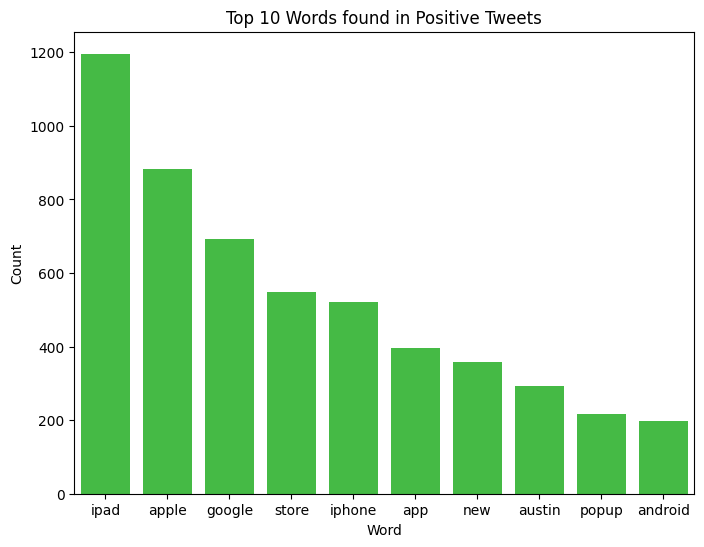

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=pos_text_df['Word'][:10], y=pos_text_df['Count'][:10], data=pos_text_df[:10], color='limegreen')
plt.title('Top 10 Words found in Positive Tweets')
plt.savefig('top10pos.png')

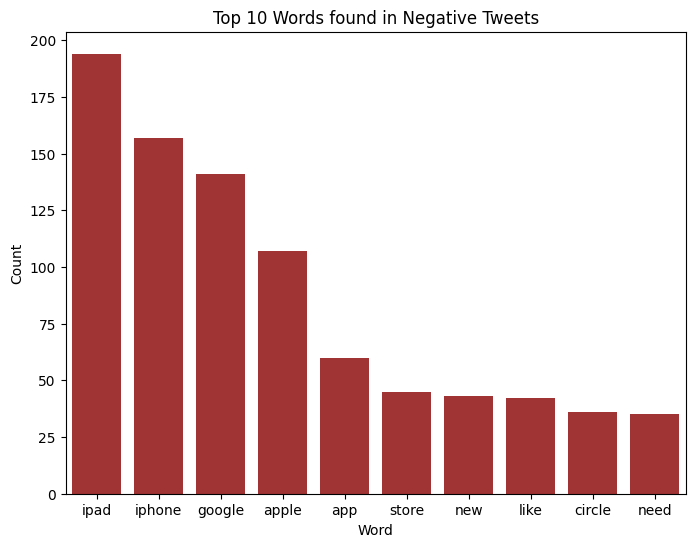

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=neg_text_df['Word'][:10], y=neg_text_df['Count'][:10], data=neg_text_df[:10], color='firebrick')
plt.title('Top 10 Words found in Negative Tweets')
plt.savefig('top10neg.png')

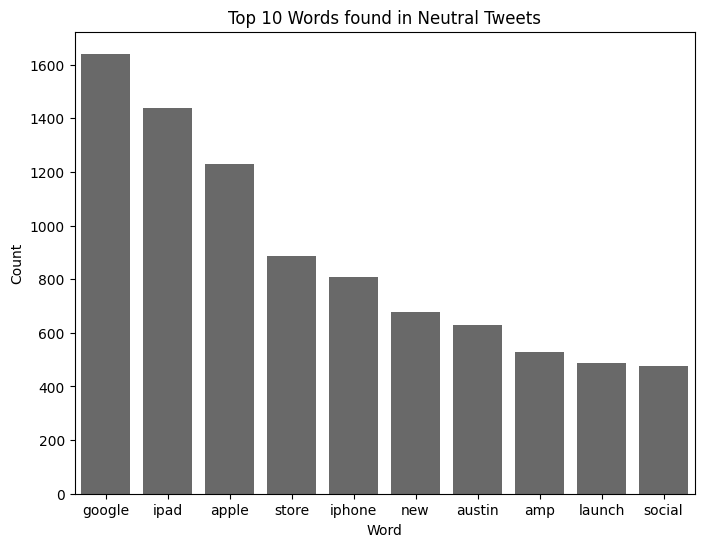

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=neu_text_df['Word'][:10], y=neu_text_df['Count'][:10], data=neu_text_df[:10], color='dimgrey')
plt.title('Top 10 Words found in Neutral Tweets')
plt.savefig('top10neu.png')

We can observe that there are a number of common words in each tweet like the brand names and brand products which do not necessarily give us a lot of information on the type of sentiment expressed. Wewill therefore check the bigrams to see if we can extract more information from the tweets.

**Bigrams for Positive Tweets.**


In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

#initializing finder
finder_pos = BigramCollocationFinder.from_words(positive_text)

#getting frequency information from finder
bigrams = finder_pos.score_ngrams(bigram_measures.raw_freq)

In [ ]:
bigrams[:50]

[(('apple', 'store'), 0.007699811859800711),
 (('iphone', 'app'), 0.004668664204585046),
 (('popup', 'store'), 0.004320256428123476),
 (('social', 'network'), 0.0029963068775695073),
 (('google', 'map'), 0.002856943766984879),
 (('new', 'social'), 0.0026827398787540938),
 (('apple', 'opening'), 0.0025433767681694655),
 (('apple', 'popup'), 0.0025085359905233084),
 (('downtown', 'austin'), 0.0024736952128771514),
 (('store', 'downtown'), 0.0024040136575848373),
 (('ipad', 'app'), 0.00236917287993868),
 (('temporary', 'store'), 0.002334332102292523),
 (('google', 'launch'), 0.002194968991707895),
 (('ipad', 'launch'), 0.002194968991707895),
 (('marissa', 'mayer'), 0.0020904466587694237),
 (('new', 'ipad'), 0.0020556058811232666),
 (('network', 'called'), 0.0019859243258309525),
 (('called', 'circle'), 0.0019162427705386384),
 (('launch', 'major'), 0.0018814019928924813),
 (('major', 'new'), 0.0018814019928924813),
 (('store', 'austin'), 0.0018117204376001672),
 (('google', 'party'), 0.00

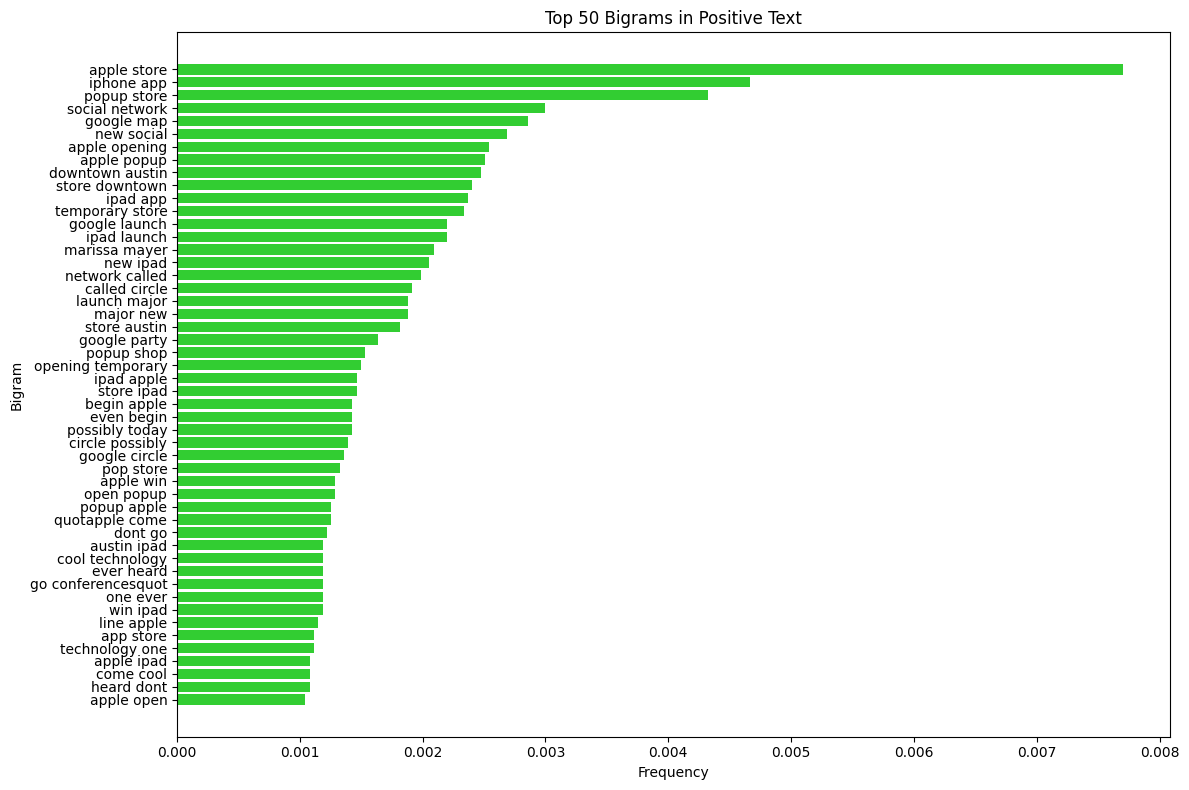

In [ ]:
# Initialize bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Initialize the bigram collocation finder with positive_text
finder_pos = BigramCollocationFinder.from_words(positive_text)

# Get frequency information from the finder
bigrams = finder_pos.score_ngrams(bigram_measures.raw_freq)

# Extract top 50 bigrams
top_bigrams = bigrams[:50]

# Extract bigram words and their frequencies
bigram_words = [' '.join(bigram) for bigram, _ in top_bigrams]
frequencies = [freq for _, freq in top_bigrams]

# Create a bar plot to visualize the bigram frequencies
plt.figure(figsize=(12, 8))
plt.barh(bigram_words, frequencies, color='limegreen')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 50 Bigrams in Positive Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.tight_layout()
plt.show()


The bigrams are providing us with better context above the tweets and the sentiments of the crowd. We can see that a lot of people are excited about a new and temporary pop-up store downtown, ipad 2 launch, Google's Marissa Mayer and a new social network called circle.

**Bigrams for Negative Tweets**

In [ ]:
#initializing finder
finder_neg = BigramCollocationFinder.from_words(negative_text)
#getting frequency information from finder
bigrams_neg = finder_neg.score_ngrams(bigram_measures.raw_freq)
#displaying top 50 bigrams
bigrams_neg[:50]

[(('iphone', 'app'), 0.003985444463697799),
 (('apple', 'store'), 0.003812164269623982),
 (('ipad', 'design'), 0.002772483105181078),
 (('new', 'social'), 0.002772483105181078),
 (('design', 'headache'), 0.0025992029111072605),
 (('google', 'circle'), 0.0025992029111072605),
 (('news', 'apps'), 0.0022526425229596257),
 (('social', 'network'), 0.0022526425229596257),
 (('fascist', 'company'), 0.0020793623288858083),
 (('ipad', 'news'), 0.0020793623288858083),
 (('major', 'new'), 0.0020793623288858083),
 (('called', 'circle'), 0.001906082134811991),
 (('network', 'called'), 0.001906082134811991),
 (('dont', 'need'), 0.0017328019407381737),
 (('google', 'launch'), 0.0017328019407381737),
 (('iphone', 'battery'), 0.0017328019407381737),
 (('launch', 'major'), 0.0017328019407381737),
 (('apps', 'fade'), 0.0015595217466643563),
 (('fade', 'fast'), 0.0015595217466643563),
 (('fast', 'among'), 0.0015595217466643563),
 (('google', 'map'), 0.0015595217466643563),
 (('new', 'ipad'), 0.00155952174

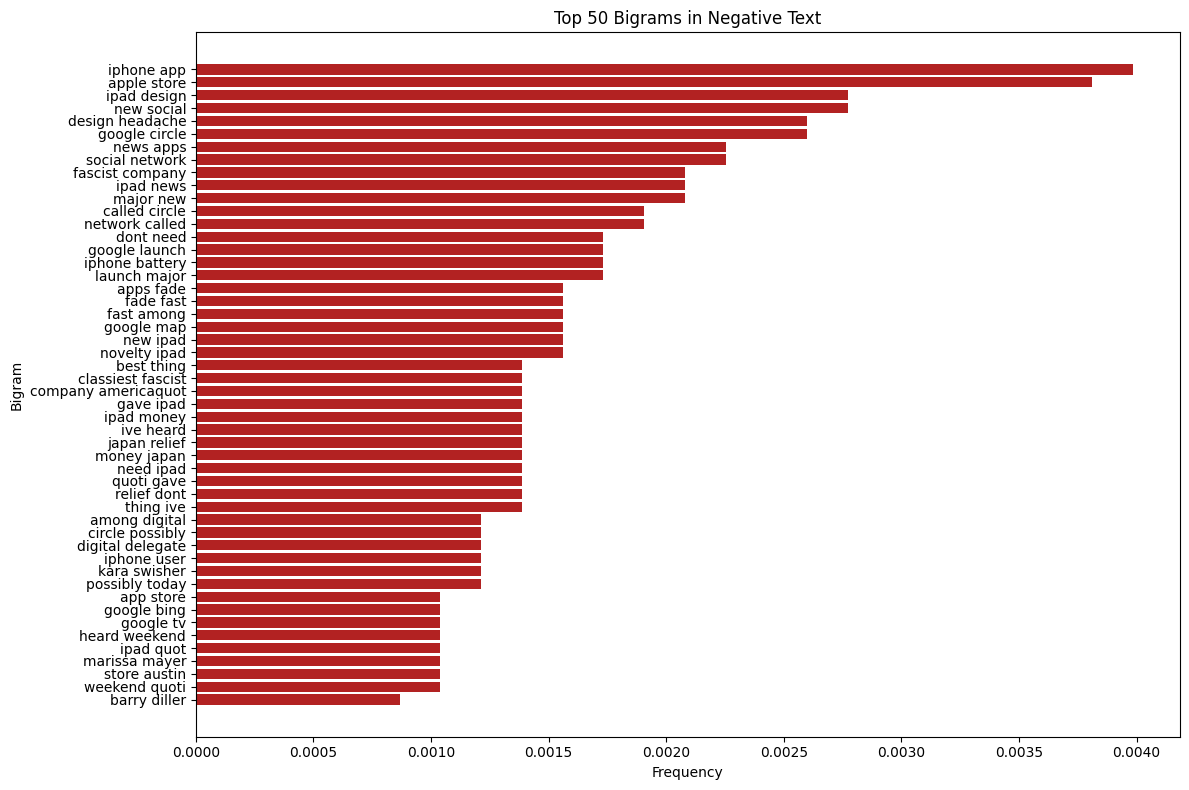

In [ ]:

# Initialize bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Initialize the bigram collocation finder with negative_text
finder_neg = BigramCollocationFinder.from_words(negative_text)

# Get frequency information from the finder
bigrams_neg = finder_neg.score_ngrams(bigram_measures.raw_freq)

# Extract top 50 bigrams
top_bigrams_neg = bigrams_neg[:50]

# Extract bigram words and their frequencies
bigram_words_neg = [' '.join(bigram) for bigram, _ in top_bigrams_neg]
frequencies_neg = [freq for _, freq in top_bigrams_neg]

# Create a bar plot to visualize the bigram frequencies for negative text
plt.figure(figsize=(12, 8))
plt.barh(bigram_words_neg, frequencies_neg, color='firebrick')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 50 Bigrams in Negative Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.tight_layout()
plt.show()




```
# This is formatted as code
```

We observe that some people were unhappy about the new design for ipad, and also on the iphone battery. The new social circle also has some negative feedback.

**Bigrams for Neutral Tweets**

In [ ]:
#initializing finder
finder_neu = BigramCollocationFinder.from_words(neutral_text)
#getting frequency information from finder
bigrams_neu = finder_neu.score_ngrams(bigram_measures.raw_freq)
#displaying top 50 bigrams
bigrams_neu[:50]

[(('social', 'network'), 0.007006062552696029),
 (('apple', 'store'), 0.006805315774681816),
 (('new', 'social'), 0.0064038222186533905),
 (('network', 'called'), 0.0050588188059581644),
 (('google', 'launch'), 0.004878146705745373),
 (('called', 'circle'), 0.004817922672341109),
 (('major', 'new'), 0.00451680250531979),
 (('launch', 'major'), 0.004396354438511262),
 (('popup', 'store'), 0.003914562171277151),
 (('possibly', 'today'), 0.003774039426667202),
 (('circle', 'possibly'), 0.003713815393262938),
 (('google', 'circle'), 0.003051351025816036),
 (('apple', 'opening'), 0.002991126992411772),
 (('store', 'austin'), 0.002669932147589031),
 (('iphone', 'app'), 0.0025494840807805037),
 (('temporary', 'store'), 0.0024491106917733972),
 (('downtown', 'austin'), 0.0023487373027662904),
 (('marissa', 'mayer'), 0.002228289235957763),
 (('apple', 'popup'), 0.002168065202553499),
 (('store', 'downtown'), 0.002047617135744971),
 (('ipad', 'launch'), 0.0019472437467378649),
 (('google', 'map'

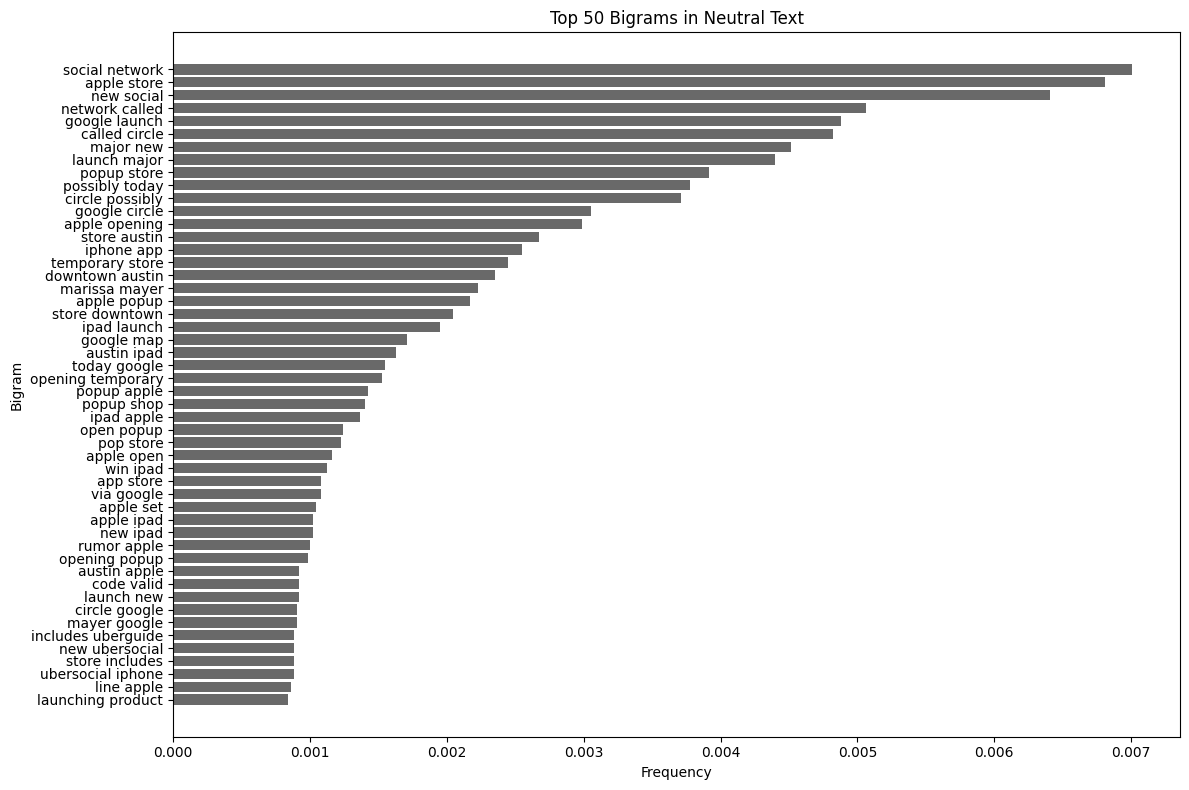

In [ ]:
# Initialize bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Initialize the bigram collocation finder with neutral_text
finder_neu = BigramCollocationFinder.from_words(neutral_text)

# Get frequency information from the finder
bigrams_neu = finder_neu.score_ngrams(bigram_measures.raw_freq)

# Extract top 50 bigrams
top_bigrams_neu = bigrams_neu[:50]

# Extract bigram words and their frequencies
bigram_words_neu = [' '.join(bigram) for bigram, _ in top_bigrams_neu]
frequencies_neu = [freq for _, freq in top_bigrams_neu]

# Create a bar plot to visualize the bigram frequencies for neutral text
plt.figure(figsize=(12, 8))
plt.barh(bigram_words_neu, frequencies_neu, color='dimgrey')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 50 Bigrams in Neutral Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.tight_layout()
plt.show()


There was neutral emotions about the social network circle as well as the pop up stores.

Wordcloud of the words and bigrams found in positive negative and neutral tweets

**Positive Tweets Wordcloud**

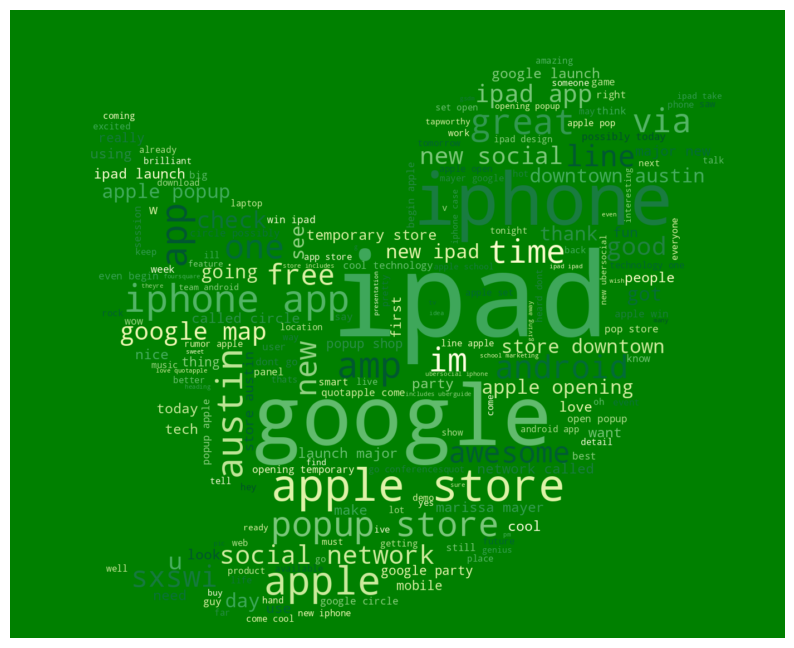

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
mask = np.array(Image.open('twitter_logo_2.png'))
wc_pos = WordCloud(background_color="green", mask=mask, colormap='YlGn')
wc_pos.generate(positive_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_pos.to_file('pos_wordcloud.png')

**Negative tweets wordcloud**

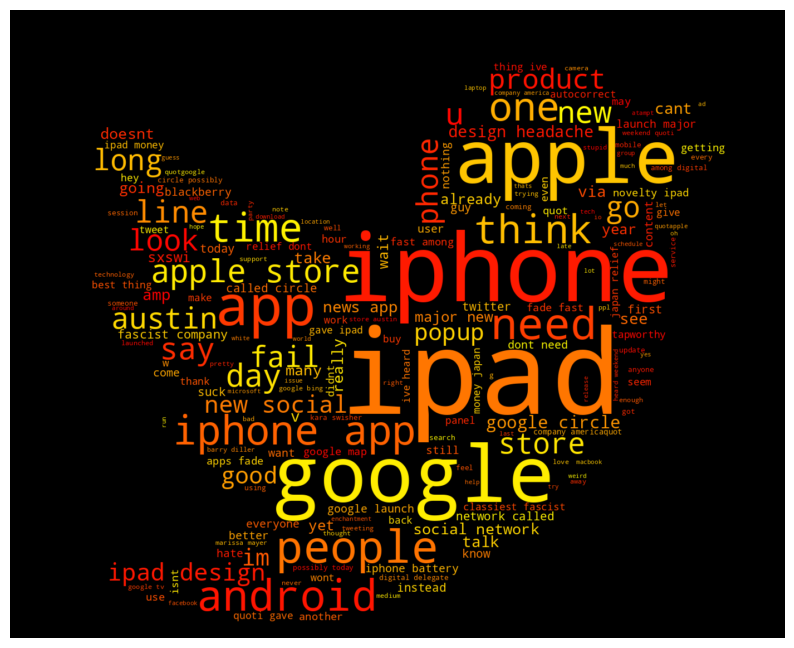

In [ ]:
wc_neg = WordCloud(background_color="black", mask=mask, colormap='autumn')
wc_neg.generate(negative_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_neg.to_file('neg_wordcloud.png')

**Neutral Tweets wordcloud**

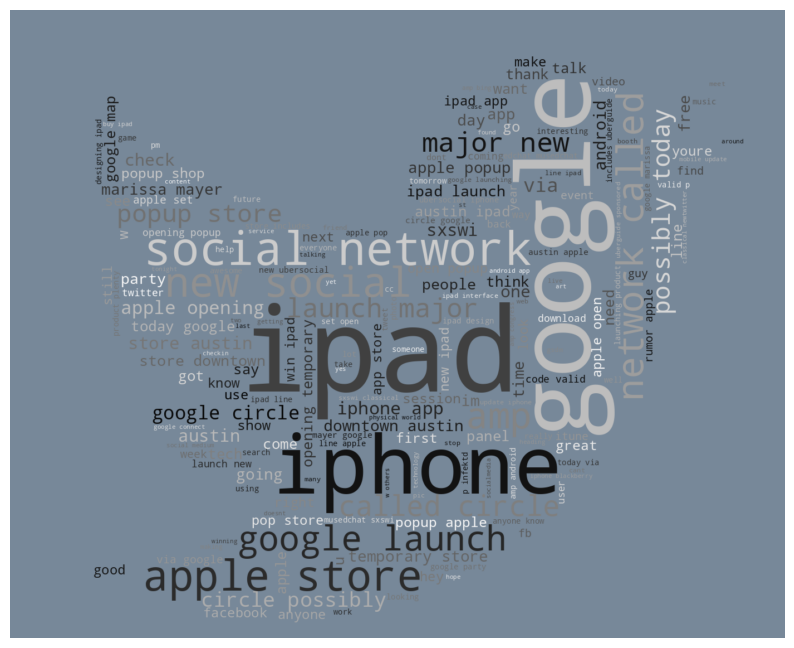

In [ ]:
wc_neu = WordCloud(background_color="lightslategray", mask=mask, colormap='gray')
wc_neu.generate(neutral_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_neu, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_neu.to_file('neu_wordcloud.png')

## Vectorization


In [ ]:
#convert target variable 'sentiment' to be of integer type
def number_map(x):
    if x == 'Positive emotion':
        return 2
    elif x == 'neutral':
        return 1
    else:
        return 0
df['sentiment'] = df['sentiment'].apply(number_map)

In [ ]:
#perform a train-test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('sentiment',axis=1), df['sentiment'], random_state=42)


Proceeded to converting lemmatized text data into TF-IDF vector representations using the TfidfVectorizer from scikit-learn. It fits the vectorizer on the training data and transforms both the training and test data. The resulting TF-IDF vectors are then converted to pandas DataFrames for further analysis and modeling.







In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of lemmatized words back to strings
X_train["lemmatized_tweet"] = X_train["lemmatized_tweet"].apply(' '.join)
X_test["lemmatized_tweet"] = X_test["lemmatized_tweet"].apply(' '.join)

# Instantiate a vectorizer with max_features=500
tfidf = TfidfVectorizer(max_features=500, stop_words=stopwords_list, strip_accents='ascii')

# Fit and transform the vectorizer on X_train["lemmatized_text"]
X_train_vectorized = tfidf.fit_transform(X_train["lemmatized_tweet"])

# Transform the test data using the same vectorizer
X_test_transformed = tfidf.transform(X_test["lemmatized_tweet"])

# Convert the transformed data to DataFrames if needed
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names_out())
X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test_transformed, columns=tfidf.get_feature_names_out())


In [ ]:
X_train_df.head()

,able,access,aclu,action,already,also,amazing,amp,android,another,...,working,world,would,wow,year,yes,yesterday,yet,youll,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.918556,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242974,0.0,0.0,...,0.0,0.375364,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_df.tail()

,able,access,aclu,action,already,also,amazing,amp,android,another,...,working,world,would,wow,year,yes,yesterday,yet,youll,youre
6697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Modelling

###1. Baseline Model: Logistic Regression

We decided to select a logistic regression with no hyperparameter tuning as the baseline classification model. Logistic regression was chosen as it is a simple classification algorithm and computationally efficient.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create and train the Logistic Regression model
model = LogisticRegression(solver='sag', max_iter=1000)
model.fit(X_train_df, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6512981199641898


In [ ]:
# Generate the classification report
report = classification_report(y_test, predictions)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.38      0.04      0.07       159
           1       0.68      0.85      0.76      1356
           2       0.57      0.41      0.47       719

    accuracy                           0.65      2234
   macro avg       0.54      0.43      0.43      2234
weighted avg       0.62      0.65      0.62      2234



For class 0 (negative emotion): The precision is 0.38, recall is 0.04, and F1-score is 0.07. This class has low precision and recall, indicating that the model struggles to correctly predict this class.

For class 1(Neutral ): The precision is 0.68, recall is 0.85, and F1-score is 0.76. This class has relatively high precision and recall, suggesting that the model performs well on this class.

For class 2(positive emotion): The precision is 0.57, recall is 0.41, and F1-score is 0.47. This class has moderate precision and recall.

The overall accuracy of the model is 0.65, meaning that approximately 65% of the instances are classified correctly.

The macro average F1-score is 0.43, indicating the overall performance across classes.

The weighted average F1-score is 0.62, which considers the class distribution.

              precision    recall  f1-score   support

           0       0.38      0.04      0.07       159
           1       0.68      0.85      0.76      1356
           2       0.57      0.41      0.47       719

    accuracy                           0.65      2234
   macro avg       0.54      0.43      0.43      2234
weighted avg       0.62      0.65      0.62      2234



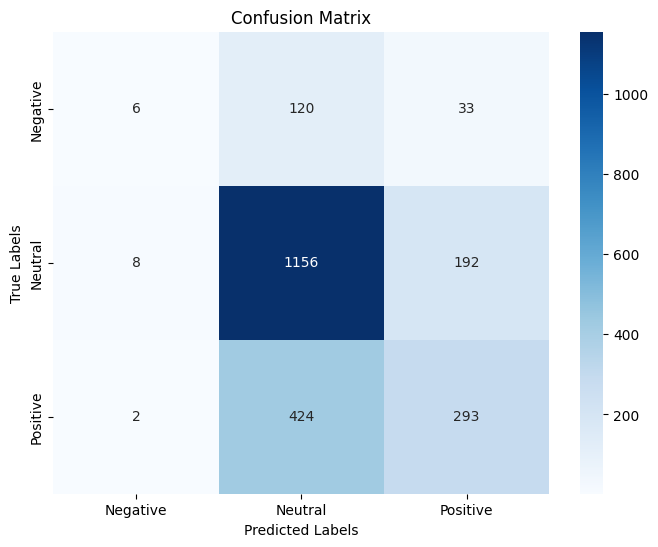

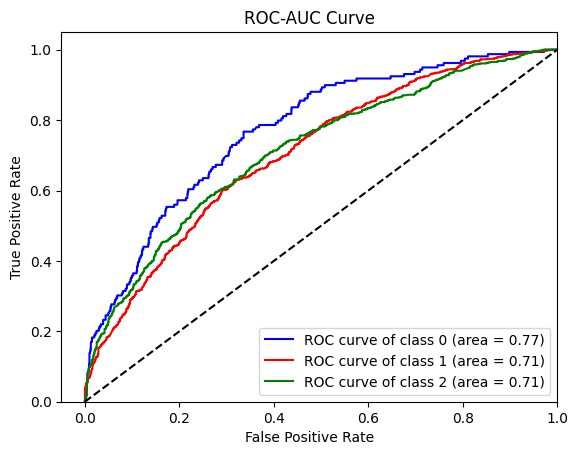

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# 1. Classification Report
report = classification_report(y_test, predictions)
print(report)

# 2. Confusion Matrix Visualization
confusion_mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 3. ROC-AUC Curve for Multi-Class Classification
# Binarize the labels for multi-class ROC
y_bin_true = label_binarize(y_test, classes=[0, 1, 2])
y_bin_pred = model.predict_proba(X_test_df)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_true[:, i], y_bin_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()


**Dealing with class imbalance using oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit predictor and target variable for oversampling
X_train_ros, y_train_ros = ros.fit_resample(X_train_vectorized, y_train)

# Check the class distribution before and after oversampling
from collections import Counter
print('Class distribution before oversampling:', Counter(y_train))
print('Class distribution after oversampling:', Counter(y_train_ros))




Class distribution before oversampling: Counter({1: 4032, 2: 2259, 0: 411})
Class distribution after oversampling: Counter({2: 4032, 1: 4032, 0: 4032})


This distribution indicates a class imbalance, where Class 1 has significantly more instances than the other classes.

After applying the Random Oversampling technique, we balanced the class distribution. Each class now has the same number of instances:


 Logistic Regression model after oversampling the data:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of Logistic Regression
logistic_regression_model = LogisticRegression()

# Fit the Logistic Regression model on the oversampled data
logistic_regression_model.fit(X_train_ros, y_train_ros)

# Make predictions on the test data
y_pred = logistic_regression_model.predict(X_test_transformed)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy: 0.5680393912264996

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.50      0.29       159
           1       0.75      0.60      0.66      1356
           2       0.50      0.53      0.52       719

    accuracy                           0.57      2234
   macro avg       0.48      0.54      0.49      2234
weighted avg       0.63      0.57      0.59      2234



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In conclusion, while the first model (with class imbalance) exhibits higher accuracy, the second model(without class imbalance) seems to strike a better balance between precision and recall across classes

**hyperparameter tuning for the Logistic Regression model using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their potential values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train_ros, y_train_ros)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.6889905671013568


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The tuned the hyperparameters of the Logistic Regression model, and the best combination of hyperparameters is {'C': 10, 'penalty': 'l1', 'solver': 'saga'}, with a corresponding best accuracy of 0.6889. This indicates that our model is performing better with these hyperparameters.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(C=10, penalty='l1', solver='saga')
best_model.fit(X_train_ros, y_train_ros)

# Transform the test data using the same TF-IDF vectorizer
X_test_vectorized = tfidf.transform(X_test["lemmatized_tweet"])

# Make predictions on the test set
best_predictions = best_model.predict(X_test_vectorized)

# Calculate accuracy and other evaluation metrics
best_accuracy = accuracy_score(y_test, best_predictions)
classification_report = classification_report(y_test, best_predictions)

print("Best Model Accuracy:", best_accuracy)
print("Classification Report:\n", classification_report)



Best Model Accuracy: 0.567591763652641
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.50      0.28       159
           1       0.75      0.60      0.67      1356
           2       0.50      0.52      0.51       719

    accuracy                           0.57      2234
   macro avg       0.48      0.54      0.49      2234
weighted avg       0.63      0.57      0.59      2234



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


With an accuracy score of 57%, Hyperparameter tuning did not improve the baseline model significantly. Let's move to a Naive Bayes model and see how it does.

### Model 2 :  Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_df, y_train)

# Make predictions on the test set
# Assuming 'tfidf' is your TF-IDF vectorizer
X_test_vectorized = tfidf.transform(X_test["lemmatized_tweet"])
nb_predictions = nb_model.predict(X_test_vectorized)


nb_accuracy = accuracy_score(y_test, nb_predictions)
classification_report_nb = classification_report(y_test, nb_predictions)

print("Naive Bayes Model Accuracy:", nb_accuracy)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model Accuracy: 0.6517457475380484
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.01      0.02       159
           1       0.67      0.90      0.76      1356
           2       0.59      0.33      0.42       719

    accuracy                           0.65      2234
   macro avg       0.53      0.41      0.40      2234
weighted avg       0.62      0.65      0.60      2234



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


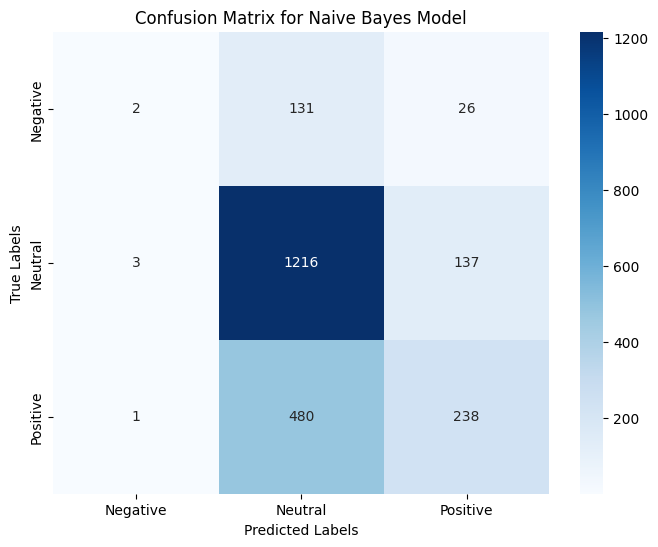

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


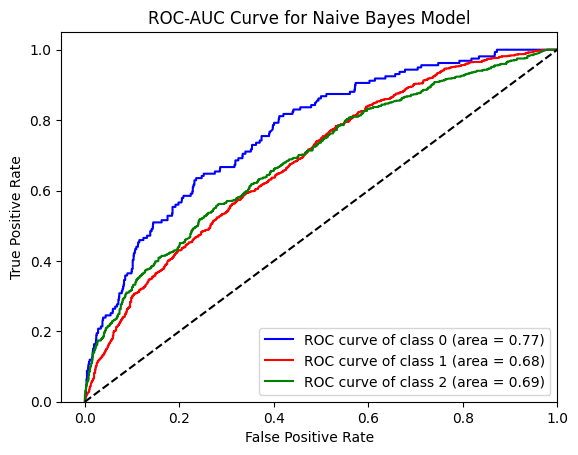

In [ ]:
# 1. Confusion Matrix Visualization for Naive Bayes Model
confusion_mat_nb = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_nb, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

# 3. ROC-AUC Curve for Multi-Class Classification (Naive Bayes Model)
# Binarize the labels for multi-class ROC
y_bin_true_nb = label_binarize(y_test, classes=[0, 1, 2])
y_bin_pred_nb = nb_model.predict_proba(X_test_vectorized)

# Compute ROC curve and ROC area for each class
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(n_classes):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_bin_true_nb[:, i], y_bin_pred_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plot the ROC curves
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_nb[i], tpr_nb[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_nb[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()


Interpretation of the data

For class 0 (Negative sentiment), the precision is low (0.33), indicating that when the model predicts a tweet as negative, it's often incorrect.
For class 1 (Neutral sentiment), the precision is relatively high (0.67), indicating that the model correctly predicts many of the neutral tweets.
For class 2 (Positive sentiment), the precision is moderate (0.59), indicating that the model is reasonably good at predicting positive tweets.
Recall: Recall measures the ability of the model to find all the relevant instances within a class. It tells us how many of the actual positive cases were predicted correctly.

For class 0 (Negative sentiment), the recall is very low (0.01), indicating that the model misses most of the negative tweets.
For class 1 (Neutral sentiment), the recall is high (0.90), indicating that the model is good at capturing neutral tweets.
For class 2 (Positive sentiment), the recall is moderate (0.33), indicating that the model finds only a portion of the positive tweets.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

For class 0 (Negative sentiment), the F1-score is very low (0.02), indicating poor overall performance for negative tweets.
For class 1 (Neutral sentiment), the F1-score is relatively high (0.76), indicating a good balance between precision and recall for neutral tweets.
For class 2 (Positive sentiment), the F1-score is moderate (0.42), indicating reasonable performance for positive tweets.

In summary, the Naive Bayes model performs quite well for neutral sentiment tweets (class 1) with high precision and recall. However, it struggles with negative sentiment tweets (class 0) where both precision and recall are low. It also has moderate performance for positive sentiment tweets (class 2).

The model's overall accuracy of 65% is decent, but it may benefit from further improvement, especially for negative sentiment predictions.

**Improving the model by  tuning the Laplace smoothing parameter (alpha).**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define a range of alpha values to tune
alpha_values = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alpha_values}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_df, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train a new Naive Bayes classifier with the best alpha
best_nb_classifier = MultinomialNB(alpha=best_alpha)
best_nb_classifier.fit(X_train_df, y_train)

# Make predictions on the test set
best_predictions = best_nb_classifier.predict(X_test_df)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, best_predictions)
classification_rep = classification_report(y_test, best_predictions)

# Print the results
print("Best Alpha:", best_alpha)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Best Alpha: 0.5
Accuracy: 0.6535362578334826
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.02      0.04       159
           1       0.67      0.89      0.76      1356
           2       0.59      0.35      0.44       719

    accuracy                           0.65      2234
   macro avg       0.54      0.42      0.41      2234
weighted avg       0.62      0.65      0.61      2234



While the accuracy of the model improved slightly, the precision for negative sentiment is still relatively low, indicating that the model struggles to correctly classify negative sentiments. This could be due to the class imbalance in the dataset, which makes it challenging for the model to learn negative sentiment patterns effectively.

### Model 3: XG Boost Model


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming your target variable is 'sentiment' and features are in 'lemmatized_tweet' column
X = df['lemmatized_tweet']
y = df['sentiment']

# Join the tokenized words into strings for TF-IDF vectorization
X = X.apply(lambda x: ' '.join(x))

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("XGBoost Accuracy:", accuracy)
print("Classification Report:\n", class_report)

XGBoost Accuracy: 0.6638702460850112
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.14      0.23       126
           1       0.69      0.88      0.77      1094
           2       0.59      0.37      0.45       568

    accuracy                           0.66      1788
   macro avg       0.61      0.46      0.48      1788
weighted avg       0.65      0.66      0.63      1788



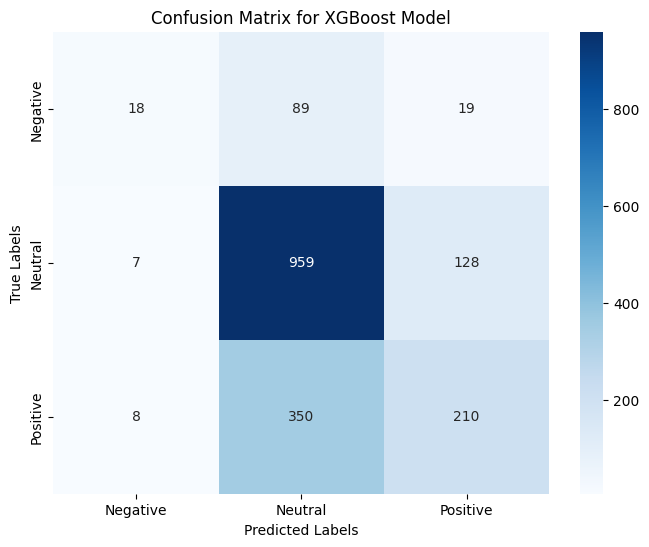

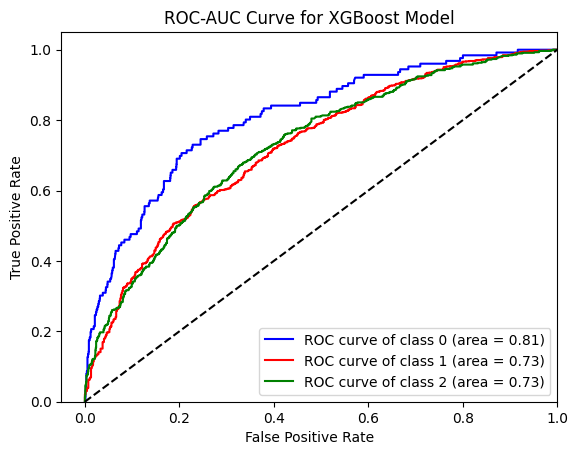

In [ ]:
# Confusion Matrix Visualization for XGBoost Model
confusion_mat_xg = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_xg, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# 3. ROC-AUC Curve for Multi-Class Classification(XGboost Model)
# Binarize the labels for multi-class ROC
y_bin_true_xg = label_binarize(y_test, classes=[0, 1, 2])
y_bin_pred_xg = xgb_model.predict_proba(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr_xg = dict()
tpr_xg = dict()
roc_auc_xg = dict()
for i in range(n_classes):
    fpr_xg[i], tpr_xg[i], _ = roc_curve(y_bin_true_xg[:, i], y_bin_pred_xg[:, i])
    roc_auc_xg[i] = auc(fpr_xg[i], tpr_xg[i])

# Plot the ROC curves
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_xg[i], tpr_xg[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_xg[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

The model attains a 66.39% accuracy, accurately categorizing sentiment in roughly two-thirds of the test data.

For Class 0 (negative sentiment): The model's precision (0.55) indicates frequent misjudgments. It displays a low recall (0.14), missing numerous instances. With a F1-score of 0.23, a blend of precision and recall, it grapples to effectively classify this sentiment.

For Class 1 (neutral sentiment): The model excels, securing a higher precision (0.69) and recall (0.88), yielding an impressive F1-score of 0.77. It adeptly identifies positive sentiment.

For Class 2 (positive sentiment): With moderate precision (0.59) and recall (0.37), it yields an intermediate F1-score (0.45). Performing better than class 0, it lags behind class 1.

XGBoost + TF-IDF achieves sound accuracy, especially in neutral sentiment. It struggles with negative sentiment.

### Model 4: Random Forest Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# target variable is 'sentiment' and features are in 'lemmatized_tweet' column
X = df['lemmatized_tweet']
y = df['sentiment']

# Join the tokenized words into strings for TF-IDF vectorization
X = X.apply(lambda x: ' '.join(x))

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# Initialize and train the Random forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Random Forest Accuracy: 0.6705816554809844
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.19      0.29       126
           1       0.70      0.84      0.77      1094
           2       0.59      0.45      0.51       568

    accuracy                           0.67      1788
   macro avg       0.62      0.49      0.52      1788
weighted avg       0.66      0.67      0.65      1788



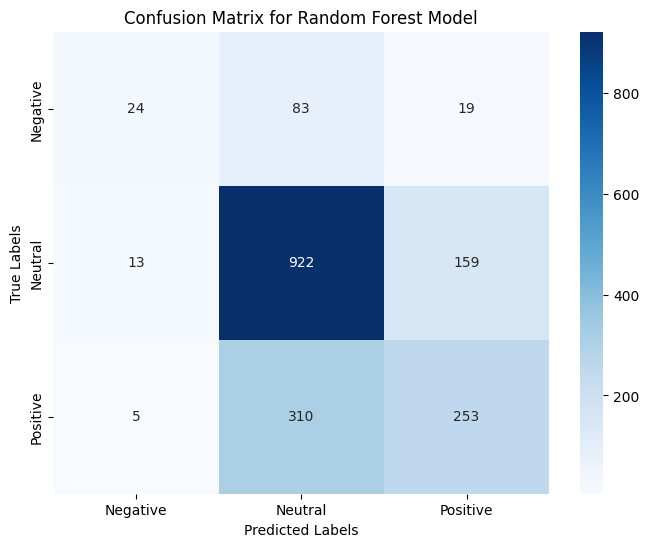

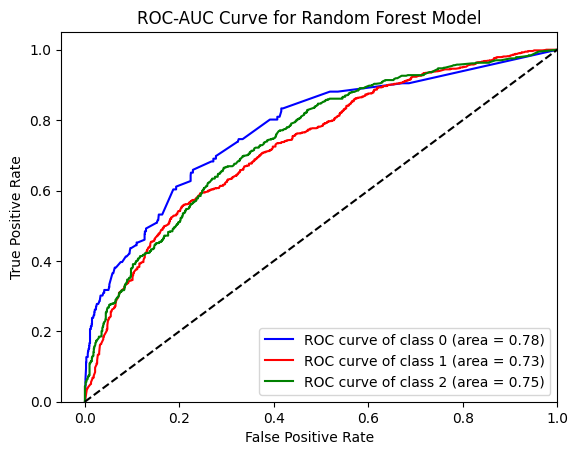

In [ ]:
# Confusion Matrix Visualization for Random Forest Model
confusion_mat_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# 3. ROC-AUC Curve for Multi-Class Classification(Random Forest Model)
# Binarize the labels for multi-class ROC
y_bin_true_rf = label_binarize(y_test, classes=[0, 1, 2])
y_bin_pred_rf = rf_classifier.predict_proba(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_bin_true_rf[:, i], y_bin_pred_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot the ROC curves
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()

The Random Forest model achieved an accuracy of about 67.06%. It performed well in identifying neutral sentiment (Class 1) with a precision of 0.70 and a recall of 0.84, leading to an F1-score of 0.77. For positive sentiment (Class 2), it achieved moderate precision (0.59) and recall (0.45), resulting in an F1-score of 0.51. However, the model struggled with negative sentiment (Class 0) with lower precision (0.57) and recall (0.19), leading to an F1-score of 0.29.

## Conclusion

The objective of this project was to devise a technique for conducting sentiment analysis on tweets discussing products from Apple and Google. To achieve this, we developed various classification models and determined that the most effective one is a random forest model achieving a 67% accuracy. This model will enable our stakeholders to discern and categorize users based on priority (negative and neutral sentiments), facilitating targeted advertising strategies.




## Recommendations

1.	Brand/Product Awareness:

*	Observation: The dataset contains numerous mentions of products like the iPad, Apple, and iPad/iPhone apps.

*	Recommendation: Stakeholders and investors should focus on these high-mention products for marketing and investment strategies. The high mention indicates a significant public awareness and interest in these products.

2.	Sentiment Analysis:

* Observation: A significant portion of the dataset (60.3%) consists of neutral sentiments, with 33.3% expressing positive emotions and only 6.4% expressing negative emotions.

*	Recommendation: These numbers suggest that the overall sentiment towards the discussed brands/products is either positive or neutral. Stakeholders and investors should consider this as a green flag for investing or marketing these products. However, they should also be vigilant about addressing the concerns that lead to negative sentiments to maintain brand reputation.

3.	Frequent Terms:

*	Observation: The word cloud visualization highlights the most frequently mentioned terms in the dataset.

*	Recommendation: Stakeholders should leverage this information for marketing campaigns and product development. Focusing on these terms can help resonate with the target audience. For example, if a particular feature (word) appears frequently, it might be worth emphasizing in marketing materials or considering for further development.

4.	Data-driven Decision Making:

*	Observation: The dataset has been cleaned, tokenized, and lemmatized, making it a valuable resource for deriving insights.
*	Recommendation: Stakeholders should consider further analyses, like trend analysis over time, topic modeling, or deeper sentiment analysis. This can provide more granular insights into customer preferences, pain points, and areas of opportunity.

5.	Engagement Strategy:

*	Observation: A significant portion of the tweets does not express any emotion towards the brand or product.

*	Recommendation: Companies should devise strategies to engage with this neutral audience segment. By converting a neutral customer to a positive advocate, brands can significantly amplify their reach and influence.

6.	Continuous Feedback Loop:

*	Observation: The dataset provides real-time feedback from users.

*	Recommendation: Brands should establish a continuous feedback loop. By actively monitoring social media sentiments, brands can be agile, addressing concerns in real-time, and iterating their products based on real customer feedback.

For potential investors, the primary takeaways would be the general positive sentiment around the products and the high levels of brand/product awareness in the market. Investing in these products or in companies producing these products might be a worthwhile consideration given the current positive sentiment.


## Next Steps/Future Research

* Develop a program that can automatically grab tweets for analysis

* Build a model to evaluate posts/comments on other forms of social media (i.e. YouTube comments)

* Incorporate trending data to see how opinions/brands of products change over time

* Train and test models that incorporate engagement on social media
	 e.g Replies, retweets, and likes for Twitter


Bulding a  function for classifying tweet

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Download NLTK data if you haven't already
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset (replace this with your actual data loading)
# Assuming you have a DataFrame 'df' with columns 'tweet' and 'sentiment'
# Replace this with your actual data loading code
# df = ...

# Define a list of stop words
stopwords_list = stopwords.words('english')
stopwords_list += [str(i) for i in range(10)]
stopwords_list += ['sxsw', 'mention', "link", "rt"]

stop_words = set(stopwords_list)

# Preprocess text by tokenizing and removing stop words
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Assuming you have your data loaded in X_train_df and y_train
# Apply lemmatization to the 'tweet' column in X_train_df
X_train_df['lemmatized_tweet'] = X_train_df['tweet'].apply(lemmatize_tokens)

# Create and configure a TF-IDF vectorizer to produce 500 features
tfidf = TfidfVectorizer(max_features=500, stop_words=stopwords_list, strip_accents='ascii')

# Fit and transform the vectorizer on X_train_df
X_train_vectorized = tfidf.fit_transform(X_train_df['lemmatized_tweet'])

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train_vectorized, y_train)

# Example usage of the classification function:
def classify_tweet(tweet_text):
    # Preprocess the input text
    preprocessed_text = preprocess_text(tweet_text)

    # Vectorize the preprocessed text using the TF-IDF vectorizer
    tweet_vectorized = tfidf.transform([preprocessed_text])

    # Predict the sentiment class for the input text
    sentiment_class = rf_classifier.predict(tweet_vectorized)[0]

    return sentiment_class

if __name__ == "__main__":
    # Input your text for classification
    input_text = "This is a positive tweet about something great!"

    # Classify the input text
    predicted_class = classify_tweet(input_text)

    # Print the predicted sentiment class
    print("Predicted Sentiment Class:", predicted_class)
